## Details
 - This is a script to test if the function TikhonovRegularizationMD.py is equivalent with the TikhonovRegularization.mat 
 - It reads an ECG from QTDataBase and calls TikhonovRegularizationMD.py over a noisy version of it.
 - It saves a .csv file with the first column the noisy ecg and the second column the reconstructed signal.
 - The function testTikhonovRegularization.mat has to be called next, which adds the TikhonovRegularization.mat corresponding reconstruction to the .csv file.
 - The two reconstructrion are compared numerically
 
By: Mircea Dumitru (mircea.dumitru@dbmi.emory.edu), Aug 2022 

In [ ]:
import os
data_dir = os.getcwd() + '/../../../../QTDataBase/'              # data (records) directory
data_files = os.listdir(data_dir)                       # get a listing of the directory, i.e. the records names
dat_files = [x.split('.')[0] for x in data_files]
#----- ---- --- -- -
file_name = 'sele0303'                                  # 'sele0603' 'sele0612' 'sel41' 'sele0122'
                                                        # 'sel40' 'sele0303'
file_to_read = data_dir + file_name
#----- ---- --- -- -
import wfdb
signals, fields = wfdb.rdsamp(file_to_read, sampfrom = 0)
fs = fields["fs"]
ch_num = 0
s = signals[:, ch_num]
#----- ---- --- -- -
n_sec = 25
N = n_sec * fs
ecg_clean = s[0 : N]
#----- ---- --- -- -
target_snr_db = 20
import numpy as np
ecg_clean = np.asanyarray(ecg_clean)
var_n = np.mean(ecg_clean**2) / (10**(target_snr_db/10))
n = np.random.normal(0, np.sqrt(var_n), len(ecg_clean))    
ecg = ecg_clean + n 

ModuleNotFoundError: No module named 'wfdb'

In [2]:
DiffOrderOrFilterCoefs = 4
Lambda = 0.3
print('DiffOrderOrFilterCoefs = ', DiffOrderOrFilterCoefs)
print('Lambda = ', Lambda)

DiffOrderOrFilterCoefs =  4
Lambda =  0.3


## Mircea's function

In [3]:
import sys
sys.path.insert(1, '../Tools')
from TikhonovRegularizationMD import TikhonovRegularizationMD
import time
t = time.time()
y = TikhonovRegularizationMD(ecg, DiffOrderOrFilterCoefs, Lambda)
elapsed = time.time() - t

print('execution time:',elapsed)

import pandas as pd
data = pd.DataFrame({'ecg1': ecg, 'ecg_hat_MD1': y})
data.to_csv('dataTikhonov.csv')  

execution time: 1.184225082397461


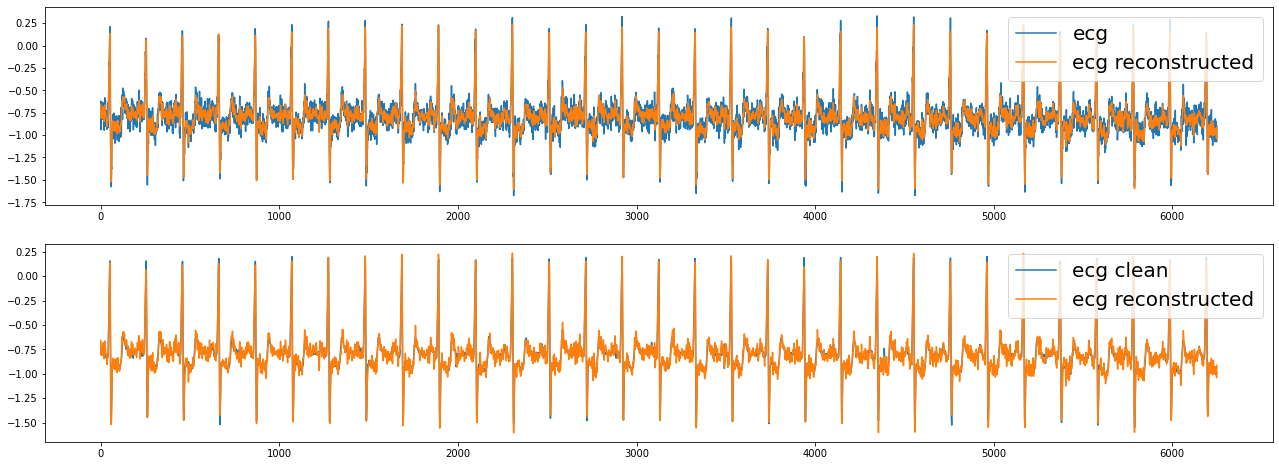

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (22, 8))
plt.subplot(2, 1, 1)
plt.plot(ecg, label = 'ecg')
plt.plot(y,label = 'ecg reconstructed')
plt.legend(fontsize = 20, loc = 1)

plt.subplot(2, 1, 2)
plt.plot(ecg_clean, label = 'ecg clean')
plt.plot(y,label = 'ecg reconstructed')
plt.legend(fontsize = 20, loc = 1)

In [ ]:
#conda install -c pspuhler matlab_engine
# import matlab.engine
# eng = matlab.engine.start_matlab()
# tf = eng.isprime(37)
# print(tf)

## Comparison 
 - The file "data.csv" was created, first column corresponds to the (noisy) ecg, scond one corresponds to the Tikhonov .py function filtered ecg
 - Run the Matlab corresponding script so the Tikhonov .mat function filtered ecg is added "dataTikhonov.csv" as the third column
 - Proceed with the next cells for comparisons

In [5]:
data_complete = pd.read_csv('dataTikhonov.csv')
ecgMD = np.array(data_complete['ecg_hat_MD1'])
ecgRS = np.array(data_complete['ecg_hat_RS1'])
#ecgMDslow = y

diff = ecgMD-ecgRS
max_diff_index = np.argmax(np.abs(diff))
max_diff = diff[max_diff_index]

# diffslow = ecgMDslow-ecgRS
# max_diffslow_index = np.argmax(np.abs(diffslow))
# max_diffslow = diff[max_diffslow_index]

# print(ecgMD[max_diff_index-5:max_diff_index+5])
# print(ecgRS[max_diff_index-5:max_diff_index+5])

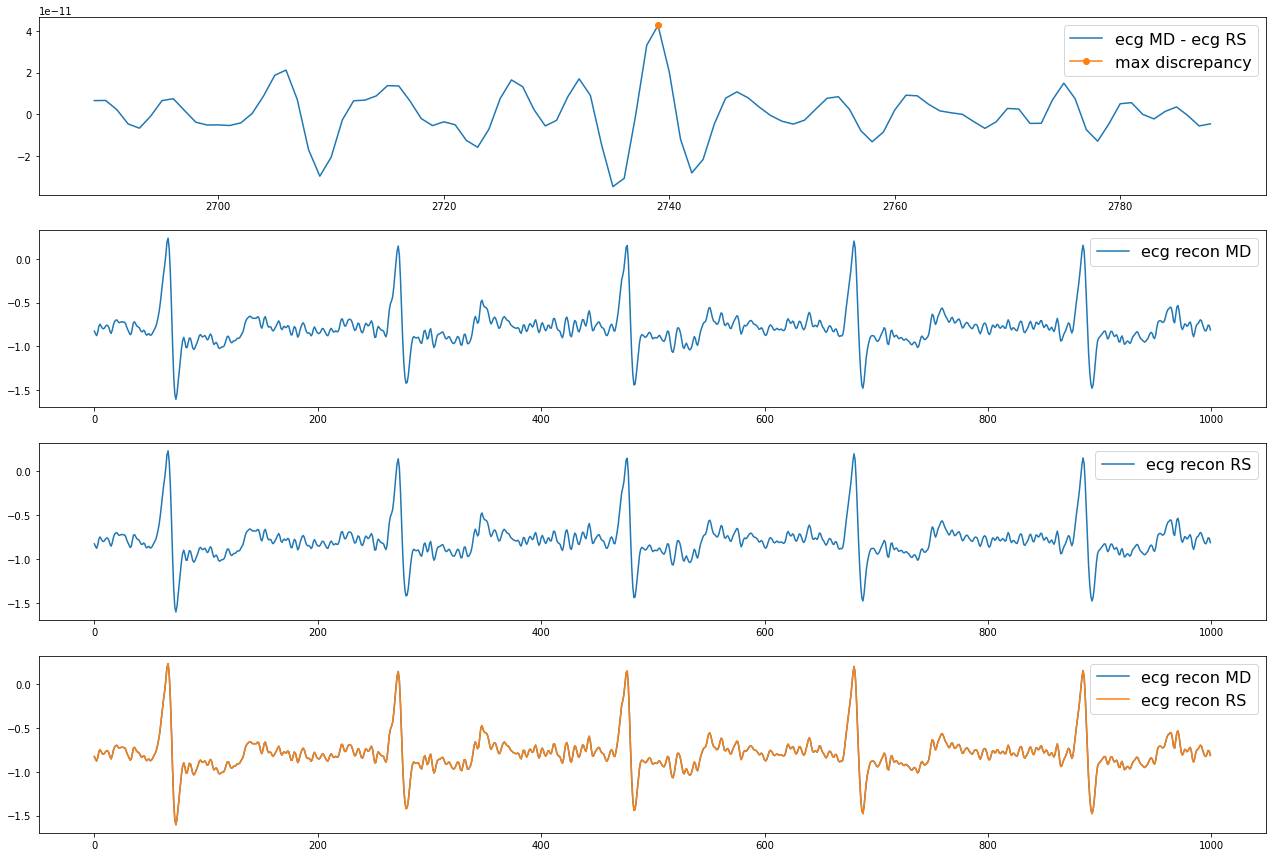

In [6]:
fig = plt.figure(figsize = (22, 15))
plt.subplot(4, 1, 1)
plt.plot(np.arange(np.max([0, max_diff_index-50]), max_diff_index+50),
         diff[np.max([0, max_diff_index-50]) : max_diff_index+50], label = 'ecg MD - ecg RS')
plt.plot(max_diff_index, diff[max_diff_index], '-o',  label = 'max discrepancy')
plt.legend(fontsize = 16, loc = 1)

plt.subplot(4, 1, 2)
plt.plot(ecgMD[max_diff_index-500:max_diff_index+500], label = 'ecg recon MD')
plt.legend(fontsize = 16, loc = 1)

plt.subplot(4, 1, 3)
plt.plot(ecgRS[max_diff_index-500:max_diff_index+500], label = 'ecg recon RS')
plt.legend(fontsize = 16, loc = 1, )

plt.subplot(4, 1, 4)
plt.plot(ecgMD[max_diff_index-500:max_diff_index+500], label = 'ecg recon MD')
plt.plot(ecgRS[max_diff_index-500:max_diff_index+500], label = 'ecg recon RS')
plt.legend(fontsize = 16, loc = 1)

## David's function

In [ ]:
import sys
sys.path.insert(1, '../Tools')
from TikhonovRegularization import TikhonovRegularization
y = TikhonovRegularization(ecg, DiffOrderOrFilterCoefs, Lambda)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (22, 8))
plt.subplot(2, 1, 1)
plt.plot(ecg, label = 'ecg')
plt.plot(y,label = 'ecg reconstructed')
plt.legend(fontsize = 12, loc = 1)

plt.subplot(2, 1, 2)
plt.plot(ecg_clean, label = 'ecg clean')
plt.plot(y,label = 'ecg reconstructed')
plt.legend(fontsize = 12, loc = 1)